# Exploratory Data Analysis (EDA) 

## Load the file

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep="|")
# df.columns
df.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\3279153326.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data Structure

In [13]:
df.shape


(1000098, 52)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [16]:
df.isnull().sum()[df.isnull().sum() > 0]



Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

### 🚨 Columns that are basically unusable:

CrossBorder → 999,400 missing (~99%)

NumberOfVehiclesInFleet → 100% missing

CustomValueEstimate → 779,642 missing (~78%)

### 😊 Columns that are mostly fine:

Gender missing only 9,536 out of ~1M (only 0.9%)

MaritalStatus missing 8,259 (0.8%)

## Convert Data Types

In [ ]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
bool_cols = ['IsVATRegistered','NewVehicle','WrittenOff','Rebuilt','Converted','CrossBorder']

for col in bool_cols:
    df[col] = df[col].astype("bool")

numeric_cols = ['RegistrationYear','Cylinders','cubiccapacity','kilowatts','CustomValueEstimate',
                'CapitalOutstanding','SumInsured','CalculatedPremiumPerTerm',
                'TotalPremium','TotalClaims']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


## Descriptive Statistics (Numerical)

In [24]:
df[numeric_cols].describe()


,RegistrationYear,Cylinders,cubiccapacity,kilowatts,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,999546.000000,999546.000000,999546.000000,2.204560e+05,999776.000000,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,2.010225e+03,4.046642,2466.743258,97.207919,2.255311e+05,52605.220796,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,3.261391e+00,0.294020,442.800640,19.393256,5.645157e+05,111417.190825,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.987000e+03,0.000000,0.000000,0.000000,2.000000e+04,-2.000000,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,2.008000e+03,4.000000,2237.000000,75.000000,1.350000e+05,0.000000,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,2.011000e+03,4.000000,2694.000000,111.000000,2.200000e+05,0.000000,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.013000e+03,4.000000,2694.000000,111.000000,2.800000e+05,0.000000,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,2.015000e+03,10.000000,12880.000000,309.000000,2.655000e+07,700000.000000,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## Variability Measures (Standard Deviation, Variance, Range)

In [25]:
variability = pd.DataFrame({
    'mean': df[numeric_cols].mean(),
    'std': df[numeric_cols].std(),
    'var': df[numeric_cols].var(),
    'min': df[numeric_cols].min(),
    'max': df[numeric_cols].max(),
    'range': df[numeric_cols].max() - df[numeric_cols].min()
})

variability


,mean,std,var,min,max,range
RegistrationYear,2010.225371,3.261391e+00,1.063667e+01,1987.000000,2.015000e+03,2.800000e+01
Cylinders,4.046642,2.940201e-01,8.644783e-02,0.000000,1.000000e+01,1.000000e+01
cubiccapacity,2466.743258,4.428006e+02,1.960724e+05,0.000000,1.288000e+04,1.288000e+04
kilowatts,97.207919,1.939326e+01,3.760984e+02,0.000000,3.090000e+02,3.090000e+02
CustomValueEstimate,225531.129942,5.645157e+05,3.186780e+11,20000.000000,2.655000e+07,2.653000e+07
CapitalOutstanding,52605.220796,1.114172e+05,1.241379e+10,-2.000000,7.000000e+05,7.000020e+05
SumInsured,604172.732589,1.508332e+06,2.275065e+12,0.010000,1.263620e+07,1.263620e+07
CalculatedPremiumPerTerm,117.875691,3.997017e+02,1.597615e+05,0.000000,7.442217e+04,7.442217e+04
TotalPremium,61.905496,2.302845e+02,5.303096e+04,-782.576754,6.528260e+04,6.606518e+04
TotalClaims,64.861190,2.384075e+03,5.683812e+06,-12002.412281,3.930921e+05,4.050945e+05


## Categorical Summary

In [29]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


Index(['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
       'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType',
       'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType'],
      dtype='object')

In [30]:
for col in categorical_cols:
    print(f"---- {col} ----")
    print(df[col].value_counts(dropna=False).head(10))
    print("\n")


---- Citizenship ----
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64


---- LegalType ----
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64


---- Title ----
Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64


---- Language ----
Language
English    1000098
Name: count, dtype: int64


---- Bank ----
Bank
First National Bank    260811
ABSA Bank              204954
Standard Bank          181715
NaN                    145961
Nedbank                132003
Capitec Bank            58155
RMB Private Bank        12576
Ithala Bank              1730
Investec Bank             732
Old Mutual                688
Name: count, dtype: int64


---- AccountType ----
AccountType
Current account         597938
Savings account         358207
NaN             

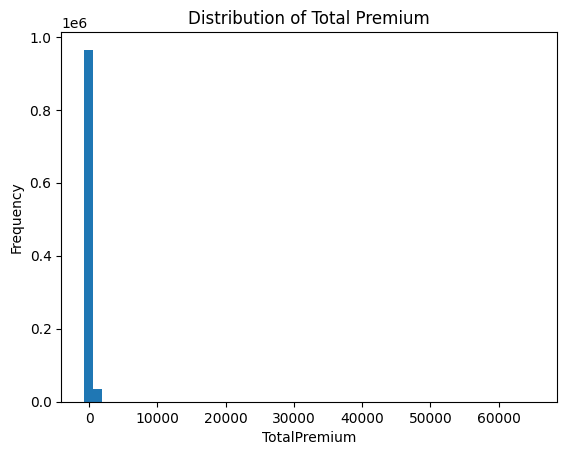

In [39]:
import matplotlib.pyplot as plt
df['TotalPremium'] = df['TotalPremium'].round(2)

df['TotalPremium'].plot(kind='hist', bins=50)
plt.title("Distribution of Total Premium")
plt.xlabel("TotalPremium")
plt.show()


In [41]:
df['TotalPremium'].max()

np.float64(65282.6)